# Import des ressources

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Import de la data

In [39]:
matches = pd.read_csv('matches.csv', index_col=0)
matches

,Date,Heure,Comp,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,...,PénM,PénT,Buts,Tirs,TC,TC%,B/Tir,B/TC,Saison,Equipe
1,2021-08-07,21:00,Ligue 1,Journée 1,Sam,Extérieur,V,2.0,1.0,Troyes,...,0.0,0.0,2.0,12.0,2.0,16.7,0.17,1.00,2022,ParisSaintGermain
2,2021-08-14,21:00,Ligue 1,Journée 2,Sam,Domicile,V,4.0,2.0,Strasbourg,...,0.0,0.0,3.0,11.0,5.0,45.5,0.27,0.60,2022,ParisSaintGermain
3,2021-08-20,21:00,Ligue 1,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,...,0.0,0.0,4.0,16.0,8.0,50.0,0.25,0.50,2022,ParisSaintGermain
4,2021-08-29,20:45,Ligue 1,Journée 4,Dim,Extérieur,V,2.0,0.0,Reims,...,0.0,0.0,2.0,12.0,3.0,25.0,0.17,0.67,2022,ParisSaintGermain
5,2021-09-11,17:00,Ligue 1,Journée 5,Sam,Domicile,V,4.0,0.0,Clermont Foot,...,0.0,0.0,4.0,13.0,7.0,53.8,0.31,0.57,2022,ParisSaintGermain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021-04-25,15:00,Ligue 1,Journée 34,Dim,Extérieur,D,1.0,5.0,Rennes,...,1.0,1.0,1.0,3.0,0.0,0.0,0.00,NaN,2021,Dijon
35,2021-05-02,15:00,Ligue 1,Journée 35,Dim,Domicile,D,1.0,5.0,Metz,...,0.0,0.0,1.0,10.0,4.0,40.0,0.10,0.25,2021,Dijon
36,2021-05-09,15:00,Ligue 1,Journée 36,Dim,Extérieur,D,0.0,3.0,Angers,...,0.0,0.0,0.0,5.0,1.0,20.0,0.00,0.00,2021,Dijon
37,2021-05-16,21:00,Ligue 1,Journée 37,Dim,Domicile,D,0.0,4.0,Nantes,...,0.0,0.0,0.0,10.0,1.0,10.0,0.00,0.00,2021,Dijon


In [40]:
matches.shape

(1500, 31)

In [41]:
matches.columns

Index(['Date', 'Heure', 'Comp', 'Tour', 'Jour', 'Tribune', 'Résultat', 'BM',
       'BE', 'Adversaire', 'xG', 'xGA', 'Poss', 'Affluence', 'Capitaine',
       'Formation', 'Arbitre', 'Rapport de match', 'Notes', 'Dist', 'CF',
       'PénM', 'PénT', 'Buts', 'Tirs', 'TC', 'TC%', 'B/Tir', 'B/TC', 'Saison',
       'Equipe'],
      dtype='object')

In [42]:
# Nous avons 2 saisons... 20 équipes... 38 matchs

2 * 20 * 38

1520

In [43]:
matches['Equipe'].value_counts()

ParisSaintGermain    75
Brest                75
Bordeaux             75
SaintEtienne         75
Metz                 75
Lorient              75
Angers               75
Montpellier          75
Monaco               75
Reims                75
Lille                75
Nantes               75
Lyon                 75
Lens                 75
Nice                 75
Strasbourg           75
Rennes               75
Marseille            75
Nimes                38
Dijon                38
Troyes               37
ClermontFoot         37
Name: Equipe, dtype: int64

In [44]:
matches.dtypes

Date                 object
Heure                object
Comp                 object
Tour                 object
Jour                 object
Tribune              object
Résultat             object
BM                  float64
BE                  float64
Adversaire           object
xG                  float64
xGA                 float64
Poss                float64
Affluence           float64
Capitaine            object
Formation            object
Arbitre              object
Rapport de match     object
Notes               float64
Dist                float64
CF                  float64
PénM                float64
PénT                float64
Buts                float64
Tirs                float64
TC                  float64
TC%                 float64
B/Tir               float64
B/TC                float64
Saison                int64
Equipe               object
dtype: object

# Simplification
## Suppression de variables

In [45]:
def mise_en_forme(df):
    # Suppression de variables inutiles
    df.drop(['Notes', 'Comp'], axis=1, inplace=True)
    df.drop(['Affluence'], axis=1, inplace=True) # pas assez de données
    # Heure
    df["Heure_fix"] = df['Heure'].str.replace(":.+", "", regex=True).astype("int")
    # Datetime
    df["Date"] = pd.to_datetime(df['Date'])
    # Jour
    df['Day_code'] = df['Date'].dt.dayofweek
    return df


In [46]:
matches = mise_en_forme(matches)

# Variables predict

In [47]:
matches["Target"] = (matches["Résultat"] == "V").astype('int')

In [48]:
matches

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,Tirs,TC,TC%,B/Tir,B/TC,Saison,Equipe,Heure_fix,Day_code,Target
1,2021-08-07,21:00,Journée 1,Sam,Extérieur,V,2.0,1.0,Troyes,1.2,...,12.0,2.0,16.7,0.17,1.00,2022,ParisSaintGermain,21,5,1
2,2021-08-14,21:00,Journée 2,Sam,Domicile,V,4.0,2.0,Strasbourg,2.5,...,11.0,5.0,45.5,0.27,0.60,2022,ParisSaintGermain,21,5,1
3,2021-08-20,21:00,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,1.4,...,16.0,8.0,50.0,0.25,0.50,2022,ParisSaintGermain,21,4,1
4,2021-08-29,20:45,Journée 4,Dim,Extérieur,V,2.0,0.0,Reims,1.2,...,12.0,3.0,25.0,0.17,0.67,2022,ParisSaintGermain,20,6,1
5,2021-09-11,17:00,Journée 5,Sam,Domicile,V,4.0,0.0,Clermont Foot,2.8,...,13.0,7.0,53.8,0.31,0.57,2022,ParisSaintGermain,17,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021-04-25,15:00,Journée 34,Dim,Extérieur,D,1.0,5.0,Rennes,1.1,...,3.0,0.0,0.0,0.00,NaN,2021,Dijon,15,6,0
35,2021-05-02,15:00,Journée 35,Dim,Domicile,D,1.0,5.0,Metz,1.0,...,10.0,4.0,40.0,0.10,0.25,2021,Dijon,15,6,0
36,2021-05-09,15:00,Journée 36,Dim,Extérieur,D,0.0,3.0,Angers,0.5,...,5.0,1.0,20.0,0.00,0.00,2021,Dijon,15,6,0
37,2021-05-16,21:00,Journée 37,Dim,Domicile,D,0.0,4.0,Nantes,0.9,...,10.0,1.0,10.0,0.00,0.00,2021,Dijon,21,6,0


## Scaling

In [49]:
matches.columns

Index(['Date', 'Heure', 'Tour', 'Jour', 'Tribune', 'Résultat', 'BM', 'BE',
       'Adversaire', 'xG', 'xGA', 'Poss', 'Capitaine', 'Formation', 'Arbitre',
       'Rapport de match', 'Dist', 'CF', 'PénM', 'PénT', 'Buts', 'Tirs', 'TC',
       'TC%', 'B/Tir', 'B/TC', 'Saison', 'Equipe', 'Heure_fix', 'Day_code',
       'Target'],
      dtype='object')

In [50]:
def scaling_categorie(df):
    ohe = OneHotEncoder(sparse=False)
    column_category = ['Tribune', 'Adversaire', 'Equipe', 'Arbitre']

    cat_enc = ohe.fit_transform(df[column_category])

    df_ohe = pd.DataFrame(cat_enc)
    return df_ohe
    

In [51]:
df_ohe = scaling_categorie(matches)

In [52]:
matches[df_ohe.columns.values] = df_ohe

In [53]:
def scaling_numerique(df, colonne_numerique):
    ss = StandardScaler()
    

    return ss.fit_transform(df[colonne_numerique])

In [54]:
colonne_numerique = ['Heure_fix', 'xG', 'xGA']
matches[colonne_numerique] = scaling_numerique(matches, colonne_numerique)

matches

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,65,66,67,68,69,70,71,72,73,74
1,2021-08-07,21:00,Journée 1,Sam,Extérieur,V,2.0,1.0,Troyes,-0.154300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021-08-14,21:00,Journée 2,Sam,Domicile,V,4.0,2.0,Strasbourg,1.481830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-08-20,21:00,Journée 3,Ven,Extérieur,V,4.0,2.0,Brest,0.097413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-08-29,20:45,Journée 4,Dim,Extérieur,V,2.0,0.0,Reims,-0.154300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-09-11,17:00,Journée 5,Sam,Domicile,V,4.0,0.0,Clermont Foot,1.859398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021-04-25,15:00,Journée 34,Dim,Extérieur,D,1.0,5.0,Rennes,-0.280156,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35,2021-05-02,15:00,Journée 35,Dim,Domicile,D,1.0,5.0,Metz,-0.406012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,2021-05-09,15:00,Journée 36,Dim,Extérieur,D,0.0,3.0,Angers,-1.035292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,2021-05-16,21:00,Journée 37,Dim,Domicile,D,0.0,4.0,Nantes,-0.531868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
def rolling_averages(group, cols, new_cols): 
    # calculer les moyennes mobiles de chaque groupe
    group = group.sort_values('Date') # tri par ordre croissant par date pour voir à quoi ressemblait les performances de l'équipe sur ses 3 derniers matchs
    # ici on prend notre liste de colonnes où nous voulons la moyenne mobile. 3 pour lmes trois dernières lignes (semaines) 
    # closed = left permet de ne pas inclure la semaine en cours. si nous sommes à la 4ème semaine, nous allons la moyenne mobile des semaines 1 à 3, pas 2 à 4 (semaine en cours)
    rolling_stats = group[cols].rolling(3, closed='left').mean() # 
    group[new_cols] = rolling_stats # on ajoute ces stats dans de nouvelles colonnes
    group = group.dropna(subset=new_cols)
    return group


# Une moyenne mobile permet de lisser une série de valeurs exprimées en fonction du temps (série chronologique). 
# Elle permet d'éliminer les fluctuations les moins significatives. On calcule des moyennes mobiles d'ordre 3, 4, 5, etc. 
# L'ordre est le nombre de périodes (années, trimestres, mois, etc.) sur lesquelles la moyenne mobile est calculée.

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [56]:
cols = ['Poss', 'Dist', 'CF', 'PénM', 'PénT', 'Buts', 'Tirs', 'TC', 'TC%', 'B/Tir', 'B/TC']
new_cols = [f'{c}_rolling' for c in cols]

In [57]:
new_cols

['Poss_rolling',
 'Dist_rolling',
 'CF_rolling',
 'PénM_rolling',
 'PénT_rolling',
 'Buts_rolling',
 'Tirs_rolling',
 'TC_rolling',
 'TC%_rolling',
 'B/Tir_rolling',
 'B/TC_rolling']

In [58]:
matches_rolling = matches.groupby('Equipe').apply(lambda x: rolling_averages(x, cols, new_cols))

In [59]:
matches_rolling = matches_rolling.droplevel('Equipe') # créer un niveau "team" inutile

In [60]:
matches_rolling

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,Dist_rolling,CF_rolling,PénM_rolling,PénT_rolling,Buts_rolling,Tirs_rolling,TC_rolling,TC%_rolling,B/Tir_rolling,B/TC_rolling
3,2020-09-20,15:00,Journée 4,Dim,Extérieur,D,1.0,4.0,Montpellier,-0.406012,...,17.033333,0.666667,0.000000,0.333333,0.666667,14.666667,4.000000,26.366667,0.043333,0.140000
4,2020-09-27,15:00,Journée 5,Dim,Domicile,V,3.0,2.0,Brest,-0.657724,...,19.633333,0.666667,0.000000,0.333333,0.666667,15.000000,3.666667,23.233333,0.040000,0.166667
5,2020-10-02,21:00,Journée 6,Ven,Extérieur,D,1.0,6.0,Paris S-G,-0.531868,...,19.800000,0.666667,0.000000,0.333333,1.666667,14.666667,4.333333,29.800000,0.130000,0.416667
6,2020-10-18,15:00,Journée 7,Dim,Domicile,N,1.0,1.0,Metz,-0.280156,...,18.166667,0.333333,0.000000,0.000000,1.666667,11.000000,3.000000,27.600000,0.156667,0.526667
7,2020-10-23,21:00,Journée 8,Ven,Extérieur,V,2.0,1.0,Rennes,0.097413,...,18.833333,0.666667,0.333333,0.333333,1.666667,8.333333,2.333333,26.033333,0.133333,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2022-04-20,19:00,Journée 33,Mer,Domicile,D,0.0,1.0,Clermont Foot,0.349125,...,15.766667,0.333333,0.333333,0.333333,1.000000,12.666667,2.666667,19.000000,0.060000,0.400000
34,2022-04-24,15:00,Journée 34,Dim,Extérieur,D,0.0,1.0,Nice,-1.161149,...,16.566667,0.333333,0.333333,0.333333,0.666667,12.000000,2.000000,16.100000,0.043333,0.333333
35,2022-05-01,13:00,Journée 35,Dim,Domicile,V,3.0,0.0,Lille,1.985254,...,16.933333,0.000000,0.333333,0.333333,0.333333,12.333333,2.666667,23.033333,0.000000,0.000000
36,2022-05-08,20:45,Journée 36,Dim,Extérieur,N,2.0,2.0,Paris S-G,0.097413,...,19.566667,0.000000,1.000000,1.000000,1.000000,10.666667,2.666667,28.066667,0.000000,0.000000


<AxesSubplot:>

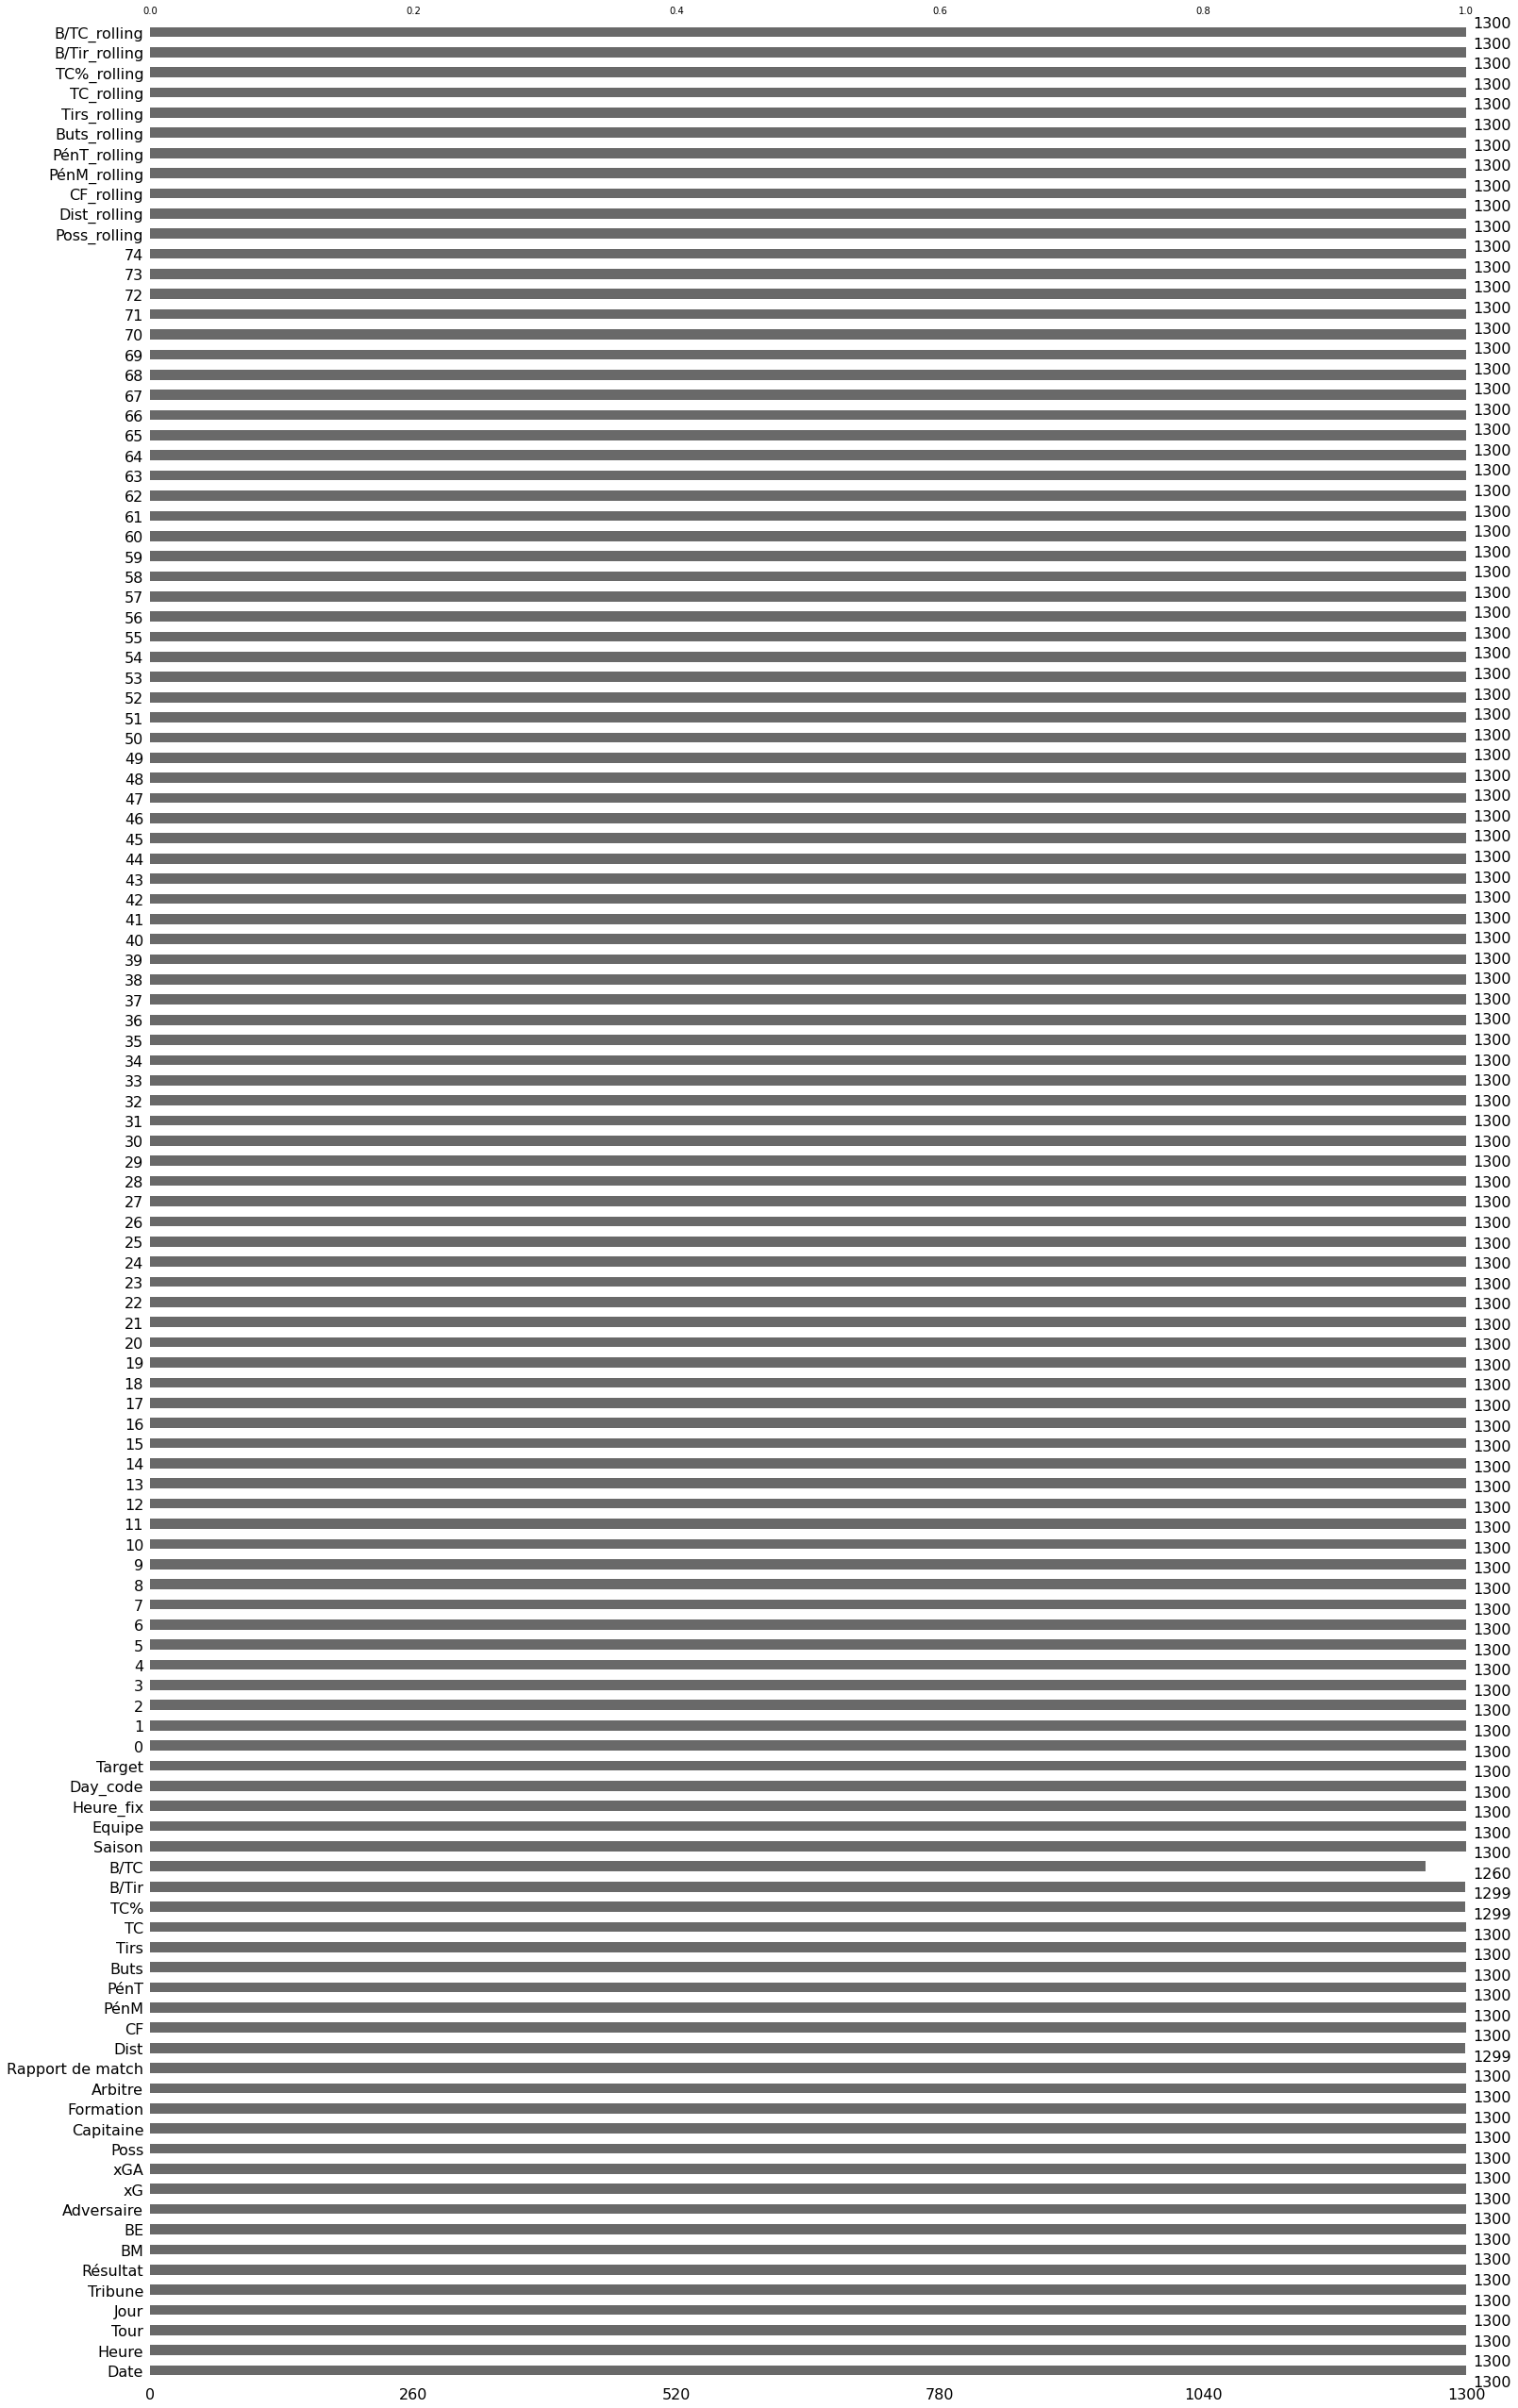

In [61]:
import missingno
missingno.bar(matches_rolling)


In [62]:
matches_rolling.dropna(inplace=True)

In [63]:
predictors = colonne_numerique + new_cols + df_ohe.columns.values.tolist()

predictors


['Heure_fix',
 'xG',
 'xGA',
 'Poss_rolling',
 'Dist_rolling',
 'CF_rolling',
 'PénM_rolling',
 'PénT_rolling',
 'Buts_rolling',
 'Tirs_rolling',
 'TC_rolling',
 'TC%_rolling',
 'B/Tir_rolling',
 'B/TC_rolling',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

# Train split

In [64]:
def make_prediction(df, predictors):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target'], axis=1),
                                                    df["Target"],
                                                    test_size=0.33,
                                                    random_state=0) 
    rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
    rf.fit(X_train[predictors], y_train)
    predict = rf.predict(X_test[predictors])
    score = rf.score(X_test[predictors], y_test)
    return rf, score
    

In [65]:
rf, score = make_prediction(matches_rolling, predictors)

In [66]:
score

0.6490384615384616

In [67]:
matches_rolling['predict'] = rf.predict(matches_rolling[predictors])
matches_rolling

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,CF_rolling,PénM_rolling,PénT_rolling,Buts_rolling,Tirs_rolling,TC_rolling,TC%_rolling,B/Tir_rolling,B/TC_rolling,predict
3,2020-09-20,15:00,Journée 4,Dim,Extérieur,D,1.0,4.0,Montpellier,-0.406012,...,0.666667,0.000000,0.333333,0.666667,14.666667,4.000000,26.366667,0.043333,0.140000,0
4,2020-09-27,15:00,Journée 5,Dim,Domicile,V,3.0,2.0,Brest,-0.657724,...,0.666667,0.000000,0.333333,0.666667,15.000000,3.666667,23.233333,0.040000,0.166667,0
5,2020-10-02,21:00,Journée 6,Ven,Extérieur,D,1.0,6.0,Paris S-G,-0.531868,...,0.666667,0.000000,0.333333,1.666667,14.666667,4.333333,29.800000,0.130000,0.416667,0
6,2020-10-18,15:00,Journée 7,Dim,Domicile,N,1.0,1.0,Metz,-0.280156,...,0.333333,0.000000,0.000000,1.666667,11.000000,3.000000,27.600000,0.156667,0.526667,0
7,2020-10-23,21:00,Journée 8,Ven,Extérieur,V,2.0,1.0,Rennes,0.097413,...,0.666667,0.333333,0.333333,1.666667,8.333333,2.333333,26.033333,0.133333,0.416667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2022-04-20,19:00,Journée 33,Mer,Domicile,D,0.0,1.0,Clermont Foot,0.349125,...,0.333333,0.333333,0.333333,1.000000,12.666667,2.666667,19.000000,0.060000,0.400000,0
34,2022-04-24,15:00,Journée 34,Dim,Extérieur,D,0.0,1.0,Nice,-1.161149,...,0.333333,0.333333,0.333333,0.666667,12.000000,2.000000,16.100000,0.043333,0.333333,0
35,2022-05-01,13:00,Journée 35,Dim,Domicile,V,3.0,0.0,Lille,1.985254,...,0.000000,0.333333,0.333333,0.333333,12.333333,2.666667,23.033333,0.000000,0.000000,1
36,2022-05-08,20:45,Journée 36,Dim,Extérieur,N,2.0,2.0,Paris S-G,0.097413,...,0.000000,1.000000,1.000000,1.000000,10.666667,2.666667,28.066667,0.000000,0.000000,0


In [68]:
pd.crosstab(index=matches_rolling['Target'], columns=matches_rolling['predict'])

predict,0,1
Target,,
0,730,45
1,151,334


In [69]:
# Victoires non-trouvées
matches_rolling[(matches_rolling['Target'] == 1) & (matches_rolling['predict'] != 1)]

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,CF_rolling,PénM_rolling,PénT_rolling,Buts_rolling,Tirs_rolling,TC_rolling,TC%_rolling,B/Tir_rolling,B/TC_rolling,predict
4,2020-09-27,15:00,Journée 5,Dim,Domicile,V,3.0,2.0,Brest,-0.657724,...,0.666667,0.000000,0.333333,0.666667,15.000000,3.666667,23.233333,0.040000,0.166667,0
11,2020-11-29,15:00,Journée 12,Dim,Extérieur,V,3.0,1.0,Lens,1.481830,...,0.666667,0.333333,0.333333,1.666667,15.000000,6.333333,43.000000,0.090000,0.190000,0
17,2021-01-06,21:00,Journée 18,Mer,Extérieur,V,2.0,1.0,Lille,-1.161149,...,0.666667,0.000000,0.000000,1.000000,9.666667,3.333333,32.400000,0.100000,0.390000,0
21,2021-01-31,15:00,Journée 22,Dim,Domicile,V,3.0,1.0,Nîmes,0.223269,...,0.333333,0.000000,0.000000,0.333333,10.666667,4.333333,38.800000,0.023333,0.046667,0
0,2021-08-08,15:00,Journée 1,Dim,Extérieur,V,2.0,0.0,Strasbourg,-0.531868,...,1.000000,0.000000,0.000000,1.666667,11.000000,4.666667,42.400000,0.150000,0.350000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2021-08-29,15:00,Journée 4,Dim,Domicile,V,3.0,1.0,Brest,0.349125,...,0.000000,0.000000,0.000000,1.000000,9.666667,2.333333,22.633333,0.106667,0.416667,0
6,2021-09-22,21:00,Journée 7,Mer,Extérieur,V,1.0,0.0,Lens,-0.531868,...,0.666667,0.666667,0.666667,2.000000,10.333333,4.000000,39.066667,0.133333,0.300000,0
4,2021-09-12,15:00,Journée 5,Dim,Extérieur,V,2.0,0.0,Metz,-0.657724,...,0.000000,0.000000,0.000000,0.333333,9.333333,3.333333,33.900000,0.033333,0.056667,0
10,2021-10-24,15:00,Journée 11,Dim,Extérieur,V,2.0,1.0,Reims,-0.783580,...,0.000000,0.000000,0.000000,0.666667,10.000000,3.333333,35.700000,0.090000,0.220000,0


# Test

In [70]:
matches_2022 = pd.read_csv('matches_saison2021-2022.csv', index_col = 0)


In [71]:
# Simplification
matches_2022 = mise_en_forme(matches_2022)

# Variable target
# matches_2022["Target"] = (matches_2022["Résultat"] == "V").astype('int')

# Scaling catégorie
ohe_2022 = scaling_categorie(matches_2022)
matches_2022[ohe_2022.columns.values] = ohe_2022

# Scaling numérique
colonne_numerique = ['Heure_fix', 'xG', 'xGA']
matches_2022[colonne_numerique] = scaling_numerique(matches_2022, colonne_numerique)

# Rolling
matches2022_rolling = matches_2022.groupby('Equipe').apply(lambda x: rolling_averages(x, cols, new_cols))
matches2022_rolling = matches2022_rolling.droplevel('Equipe') # créer un niveau "team" inutile
matches2022_rolling.dropna(inplace=True)

predictors = colonne_numerique + new_cols + df_ohe.columns.values.tolist()


matches2022_rolling['predict'] = rf.predict(matches2022_rolling[predictors])

matches2022_rolling['Année'] = matches2022_rolling['Date'].dt.year

In [72]:
# Manque-t-il des valeurs pour la journée 38 ?
matches_2022[(matches_2022['Tour'] == "Journée 38") & (matches_2022['Date'].dt.year == 2022)]

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,65,66,67,68,69,70,71,72,73,74
49,2022-05-21,21:00,Journée 38,Sam,Domicile,V,5,0,Metz,4.466191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,2022-05-21,21:00,Journée 38,Sam,Domicile,V,4,0,Strasbourg,1.590138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2022-05-21,21:00,Journée 38,Sam,Extérieur,N,2,2,Lens,-0.160503,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,2022-05-21,21:00,Journée 38,Sam,Extérieur,N,2,2,Lille,-0.410594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,2022-05-21,21:00,Journée 38,Sam,Extérieur,V,3,2,Reims,0.714818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39,2022-05-21,21:00,Journée 38,Sam,Extérieur,D,0,4,Marseille,-0.535640,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40,2022-05-21,21:00,Journée 38,Sam,Domicile,N,2,2,Monaco,1.215001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,2022-05-21,21:00,Journée 38,Sam,Extérieur,V,2,1,Clermont Foot,0.964909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,2022-05-21,21:00,Journée 38,Sam,Domicile,N,1,1,Saint-Étienne,1.089955,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48,2022-05-21,21:00,Journée 38,Sam,Domicile,N,2,2,Rennes,0.214634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
matches2022_rolling

,Date,Heure,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,...,PénM_rolling,PénT_rolling,Buts_rolling,Tirs_rolling,TC_rolling,TC%_rolling,B/Tir_rolling,B/TC_rolling,predict,Année
3,2020-09-20,15:00,Journée 4,Dim,Extérieur,D,1,4,Montpellier,-0.410594,...,0.000000,0.333333,0.666667,14.666667,4.000000,26.366667,0.043333,0.140000,0,2020
4,2020-09-27,15:00,Journée 5,Dim,Domicile,V,3,2,Brest,-0.660686,...,0.000000,0.333333,0.666667,15.000000,3.666667,23.233333,0.040000,0.166667,0,2020
5,2020-10-02,21:00,Journée 6,Ven,Extérieur,D,1,6,Paris S-G,-0.535640,...,0.000000,0.333333,1.666667,14.666667,4.333333,29.800000,0.130000,0.416667,0,2020
6,2020-10-18,15:00,Journée 7,Dim,Domicile,N,1,1,Metz,-0.285549,...,0.000000,0.000000,1.666667,11.000000,3.000000,27.600000,0.156667,0.526667,0,2020
7,2020-10-23,21:00,Journée 8,Ven,Extérieur,V,2,1,Rennes,0.089589,...,0.333333,0.333333,1.666667,8.333333,2.333333,26.033333,0.133333,0.416667,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2022-04-24,15:00,Journée 34,Dim,Extérieur,D,0,1,Nice,-1.160869,...,0.333333,0.333333,0.666667,12.000000,2.000000,16.100000,0.043333,0.333333,0,2022
35,2022-05-01,13:00,Journée 35,Dim,Domicile,V,3,0,Lille,1.965275,...,0.333333,0.333333,0.333333,12.333333,2.666667,23.033333,0.000000,0.000000,1,2022
36,2022-05-08,20:45,Journée 36,Dim,Extérieur,N,2,2,Paris S-G,0.089589,...,1.000000,1.000000,1.000000,10.666667,2.666667,28.066667,0.000000,0.000000,0,2022
37,2022-05-14,21:00,Journée 37,Sam,Domicile,D,1,3,Lens,-1.285915,...,1.333333,1.333333,1.666667,8.000000,2.333333,29.600000,0.036667,0.166667,0,2022


In [74]:
matches2022_rolling[(matches2022_rolling['Tour'] == "Journée 38") & (matches2022_rolling['Année'] == 2022)][['Date', 'Heure', 'Tour', 'Equipe', 'Adversaire', 'Résultat', 'predict']]

,Date,Heure,Tour,Equipe,Adversaire,Résultat,predict
38,2022-05-21,21:00,Journée 38,Angers,Montpellier,V,0
39,2022-05-21,21:00,Journée 38,Bordeaux,Brest,V,1
40,2022-05-21,21:00,Journée 38,Brest,Bordeaux,D,0
39,2022-05-21,21:00,Journée 38,ClermontFoot,Lyon,D,1
40,2022-05-21,21:00,Journée 38,Lens,Monaco,N,1
48,2022-05-21,21:00,Journée 38,Lille,Rennes,N,0
47,2022-05-21,21:00,Journée 38,Lyon,Clermont Foot,V,1
38,2022-05-21,21:00,Journée 38,Metz,Paris S-G,D,0
54,2022-05-21,21:00,Journée 38,Monaco,Lens,N,0
40,2022-05-21,21:00,Journée 38,Montpellier,Angers,D,0
